In [1]:
import pandas as pd
import sqlite3
from dbhelper import getTableSelect
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

In [2]:
city = ['Michendorf', 'Riga']
ct = """c.cityname = '""" + """' OR c.cityname = '""".join(city) + """'"""
print(ct)

c.cityname = 'Michendorf' OR c.cityname = 'Riga'


In [6]:
query = """SELECT c.cityname as city, w.sur, w.sus, w.ts FROM Cities c
INNER JOIN 
(SELECT DISTINCT round((timestampUNX)/3600/24)*3600*24 as ts, sunrise as sur, sunset as sus, ctyid FROM Wetter) w
ON w.ctyid = c.ctyid
WHERE {} ORDER BY ts""".format(ct)
print(query)
data = pd.read_sql_query(query,sqlite3.connect('wetter.db'))
print(data.columns)
data

SELECT c.cityname as city, w.sur, w.sus, w.ts FROM Cities c
INNER JOIN 
(SELECT DISTINCT round((timestampUNX)/3600/24)*3600*24 as ts, sunrise as sur, sunset as sus, ctyid FROM Wetter) w
ON w.ctyid = c.ctyid
WHERE c.cityname = 'Michendorf' OR c.cityname = 'Riga' ORDER BY ts
Index(['city', 'sur', 'sus', 'ts'], dtype='object')


,city,sur,sus,ts
0,Michendorf,1582869483,1582908204,1.582848e+09
1,Michendorf,1582955750,1582994714,1.582848e+09
2,Michendorf,1582955750,1582994714,1.582934e+09
3,Michendorf,1583042017,1583081223,1.582934e+09
4,Michendorf,1583042017,1583081223,1.583021e+09
...,...,...,...,...
1577,Riga,1639032535,1639057400,1.638922e+09
1578,Michendorf,1639033532,1639061717,1.638922e+09
1579,Riga,1639032535,1639057400,1.639008e+09
1580,Michendorf,1639033532,1639061717,1.639008e+09


In [7]:
data['sur_dt'] = data.apply(lambda x : (int(datetime.utcfromtimestamp(x['sur']).strftime('%H'))+int(datetime.utcfromtimestamp(x['sur']).strftime('%M'))/60), axis=1)
data['sus_dt'] = data.apply(lambda x : int(datetime.utcfromtimestamp(x['sus']).strftime('%H'))+int(datetime.utcfromtimestamp(x['sus']).strftime('%M'))/60, axis=1)
data['ts_dt'] = data.apply(lambda x : datetime.utcfromtimestamp(x['ts']), axis=1)
data['ts_year'] = data.apply(lambda x : (datetime.utcfromtimestamp(x['ts']).strftime('%Y')), axis=1)

print(data)

            city         sur         sus            ts    sur_dt     sus_dt  \
0     Michendorf  1582869483  1582908204  1.582848e+09  5.966667  16.716667   
1     Michendorf  1582955750  1582994714  1.582848e+09  5.916667  16.750000   
2     Michendorf  1582955750  1582994714  1.582934e+09  5.916667  16.750000   
3     Michendorf  1583042017  1583081223  1.582934e+09  5.883333  16.783333   
4     Michendorf  1583042017  1583081223  1.583021e+09  5.883333  16.783333   
...          ...         ...         ...           ...       ...        ...   
1577        Riga  1639032535  1639057400  1.638922e+09  6.800000  13.716667   
1578  Michendorf  1639033532  1639061717  1.638922e+09  7.083333  14.916667   
1579        Riga  1639032535  1639057400  1.639008e+09  6.800000  13.716667   
1580  Michendorf  1639033532  1639061717  1.639008e+09  7.083333  14.916667   
1581  Michendorf  1639033532  1639061715  1.639008e+09  7.083333  14.916667   

          ts_dt ts_year  
0    2020-02-28    2020  

In [35]:

dta = []
for cty in [city[0]]:
    dta_temp = data[(data["city"] ==cty) & (data['ts_year'] == '2021')]#.set_index('ts_dt')
    dta_temp = dta_temp.drop_duplicates(subset=['ts_dt'])
    #dta_temp = dta_temp.interpolate()
    dta_temp['day_abs'] = dta_temp['ts'].apply(lambda x: mt.floor(x/3600.0/24.0) )
    dta_temp['sur_dt_diff'] = dta_temp['sur_dt'].rolling(window=2).apply(lambda x: (x[1] - x[0] ))
    #dta_temp['sur_dt_diff'] = dta_temp['sur'].rolling(window=2).apply(lambda x: max (-3,min(3, (x[1] - x[0])/60.0 )) )
    #dta_temp['sur_dt_diff'] = dta_temp['sur'].rolling(window=3).apply(lambda x: (x[1] - x[0] + x[2] - x[1])/2/3600-24)
    #dta_temp['sus_dt_diff'] = dta_temp['sus'].rolling(window=3).apply(lambda x: (x[1] - x[0] + x[2] - x[1])/2/3600-24)
    dta.append(dta_temp)



print(dta)

[           city         sur         sus            ts    sur_dt     sus_dt  \
311  Michendorf  1609489053  1609517106  1.609459e+09  8.283333  16.083333   
312  Michendorf  1609575443  1609603571  1.609546e+09  8.283333  16.100000   
313  Michendorf  1609661829  1609690038  1.609632e+09  8.283333  16.116667   
314  Michendorf  1609748213  1609776508  1.609718e+09  8.266667  16.133333   
315  Michendorf  1609834592  1609862981  1.609805e+09  8.266667  16.150000   
..          ...         ...         ...           ...       ...        ...   
822  Michendorf  1638691243  1638719803  1.638662e+09  8.000000  15.933333   
825  Michendorf  1638777719  1638806176  1.638749e+09  8.016667  15.933333   
827  Michendorf  1638864192  1638892553  1.638835e+09  8.050000  15.916667   
829  Michendorf  1638950664  1638978933  1.638922e+09  8.066667  15.916667   
832  Michendorf  1639037132  1639065317  1.639008e+09  8.083333  15.916667   

         ts_dt ts_year  day_abs  sur_dt_diff  
311 2021-01-01 

C:\Users\pkr\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  import sys


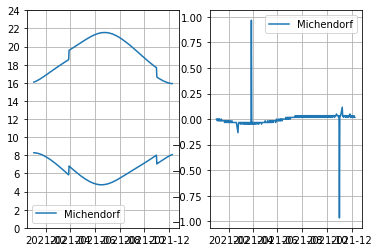

In [36]:
#%%
clrs = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
clr_idx = 0
plt.figure(1)
plt.subplot(1,2,1)
for _dta in dta:
    cty = _dta.iloc[0]['city']
    plt.plot(_dta['ts_dt'],_dta['sur_dt'],
        clrs[clr_idx], label=cty)
    plt.plot(_dta['ts_dt'],_dta['sus_dt'],
        clrs[clr_idx], label='')
    clr_idx = clr_idx + 1
plt.legend()
plt.grid(True)
plt.ylim([0,24])
plt.yticks([i*2 for i in range(13)])

clr_idx = 0
plt.subplot(1,2,2)
for _dta in [dta[0]]:
    cty = _dta.iloc[0]['city']
    plt.plot(_dta['ts_dt'],_dta['sur_dt_diff'],
        clrs[clr_idx], label=cty)
    #plt.plot(_dta['ts_dt'],_dta['sus_dt_diff'],
    #    clrs[clr_idx], label='')
    clr_idx = clr_idx + 1
plt.legend()
plt.grid(True)
plt.show()
